#       Predicción de Enfermedades Cardiovasculares

Las enfermedades cardiovasculares permanecen como la principal causa de muerte en Chile y el mundo. En nuestro país, según datos del INE 2016, representaron un 27.1% del total de las defunciones (a expensas principalmente de accidente cerebrovascular e infarto agudo al miocardio), seguido de tumores malignos (25%) y de enfermedades del sistema respiratorio (9.5%), entre otras.

Respecto a los Factores de Riesgo Cardiovascular, éstos se clasifican en Factores de Riesgo no modificables (edad, sexo, antecedentes personales y en familiares de 1er grado de enfermedad cardiovascular) y en Factores de Riesgo modificables (Diabetes, Hipertensión, Dislipidemia, Sedentarismo, Tabaquismo, Enfermedad Renal Crónica, Obesidad abdominal, Obesidad por IMC, hipertrigliceridemia), constituyendo estos últimos el principal foco de intervención a fin de disminuir el Riesgo Cardiovascular, y con ello disminuir el Riesgo de sufrir alguna Enfermedad Cardiovascular.

En relación a los Factores de Riesgo de infarto agudo al miocardio, en un sub-análisis del estudio internacional INTERHEART (que incluyó 6 países latinoamericanos), se encontró que los factores más relevantes que aumentan $el$ $riesgo$ $de$ $padecer$ $un$ $infarto$ $agudo$ $al$ $miocardio$ $son$ $la$ $hipertensión$, $la$ $diabetes$ $mellitus$, $el$ $tabaquismo$, $la$ $Dislipidemia$ $y$ $la$ $obesidad$ $abdominal$, en cambio el ejercicio regular y el consumo de frutas y verduras resultaron ser factores protectores.

Si bien existe una caída de 40.6% a 33.3% respecto a población fumadora, se observa un aumento en la tasa de obesidad, posicionando a Chile como el segundo país de la Organización para la Cooperación y el Desarrollo Económicos (OCDE), con la tasa más alta de obesidad, de hipertensos y de diabéticos respectivamente.  Respecto a los resultados en cuanto a estilos de vida saludables, éstos son alarmantes. Si bien la tasa de sedentarismo continúa siendo alta, no se están cumpliendo las recomendaciones impartidas por la OMS en cuanto a alimentación saludable;  28% consumen al menos 6 vasos de agua/día, 9% consumen pescados o mariscos al menos 2 veces por semana, 24% consumen legumbres al menos 2 veces por semana, 1.6% consumen < de 5 gr/sal al día (consumo promedio de sal es de 9.4 gr/día).

El presente análisis tiene como propósito, diseñar un sistema de predicción, basado en diferentes técnicas y modelos de aprendizaje automático. El problema a abordar se basa en datos clínicos de varios pacientes, que se encuentran en la base de datos de la Clínica Cleveland. Por ser un problema de clasificación se evaluará por medio de Random Forest, K-Means y Máquinas de Soporte Vectorial. Una vez que se tengan los resultados de los modelos, se realizará una comparación y evaluación, para determinar el o los mejores modelos para el conjunto de datos.



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as coly
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import cross_validate, KFold, learning_curve,cross_val_score, RandomizedSearchCV, train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.covariance import EllipticEnvelope
from sklearn.decomposition import PCA
from sklearn.metrics import plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import export_graphviz 
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
np.random.seed(123) 
import shap 
from pdpbox import pdp, info_plots 
import math
import random
import os
import time

from numpy import interp

import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Estilo...
cust_palt = ['#111d5e', '#c70039', '#f37121', '#ffbd69', '#ffc93c']

plt.style.use('ggplot')

In [3]:

def seed_all(seed):
     
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

seed = 42    
seed_all(seed)

In [4]:
# Lectura del dataset

In [5]:
df = pd.read_csv("Heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Analisemos si las clases estàn balanceadas

Text(0.5, 1.0, 'Target class destribution')

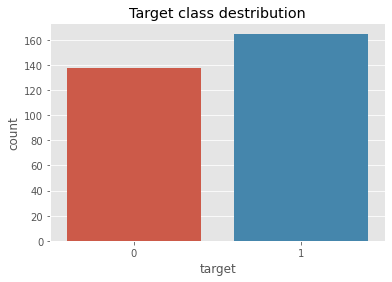

In [8]:
plt.plot()
sns.countplot(x='target', data=df)
plt.title('Target class destribution')

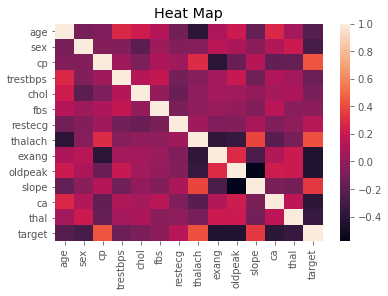

In [9]:
plt.plot()
sns.heatmap(df.corr())
plt.title('Heat Map');

In [10]:
print(
    f'df dataset tiene {df.shape[1]} columnas, {df.shape[0]} observaciones.\ndf las columnas son:\n{df.columns.tolist()}\n'
)

df dataset tiene 14 columnas, 303 observaciones.
df las columnas son:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']



In [11]:
# Analisemos si tenemos datos nulos

In [12]:
df.isnull().sum().sum()

0

In [13]:
# No hay datos nulos

In [14]:
# renombrare las columnas, para mejorar el entendimiento de cada una de las observaciones

In [15]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'condition']

In [16]:
df.nunique()

age                         41
sex                          2
chest_pain_type              4
resting_blood_pressure      49
cholesterol                152
fasting_blood_sugar          2
rest_ecg                     3
max_heart_rate_achieved     91
exercise_induced_angina      2
st_depression               40
st_slope                     3
num_major_vessels            5
thalassemia                  4
condition                    2
dtype: int64

In [17]:
# Renombrando los datos categoricos

In [18]:
df['sex'] = df['sex'].map({0:'female',1:'male'})
df['chest_pain_type'] = df['chest_pain_type'].map({3:'asymptomatic', 1:'atypical_angina', 2:'non_anginal_pain', 0:'typical_angina'})
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].map({0:'less_than_120mg/ml',1:'greater_than_120mg/ml'})
df['rest_ecg'] = df['rest_ecg'].map({0:'normal',1:'ST-T_wave_abnormality',2:'left_ventricular_hypertrophy'})
df['exercise_induced_angina'] = df['exercise_induced_angina'].map({0:'no',1:'yes'})
df['st_slope'] = df['st_slope'].map({0:'upsloping',1:'flat',2:'downsloping'})
df['thalassemia'] = df['thalassemia'].map({1:'fixed_defect',0:'normal',2:'reversable_defect'})
df['condition'] = df['condition'].map({0:'no_disease', 1:'has_disease'})

In [19]:
categorical = [i for i in df.loc[:,df.nunique()<=10]]
continuous = [i for i in df.loc[:,df.nunique()>=10]]

In [20]:
def ctg_dist(df_01, cols, hue=None,rows=3, columns=3):
    
    '''esta funcion muestra la distribucion de datos categoricos'''
    
    fig, axes = plt.subplots(rows, columns, figsize=(16, 12))
    axes = axes.flatten()

    for i, j in zip(df[cols].columns, axes):
        sns.countplot(x=i,
                    data=df_01,
                    palette=cust_palt,
                    hue=hue,
                    ax=j,
                    order=df_01[i].value_counts().index)
        j.tick_params(labelrotation=10)
        
        total = float(len(df_01[i]))
        
        j.set_title(f'{str(i).capitalize()} Distribution')
        
        
        for p in j.patches:
            height = p.get_height()
            j.text(p.get_x() + p.get_width() / 2.,
                    height + 2,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha='center')
        
        plt.tight_layout()

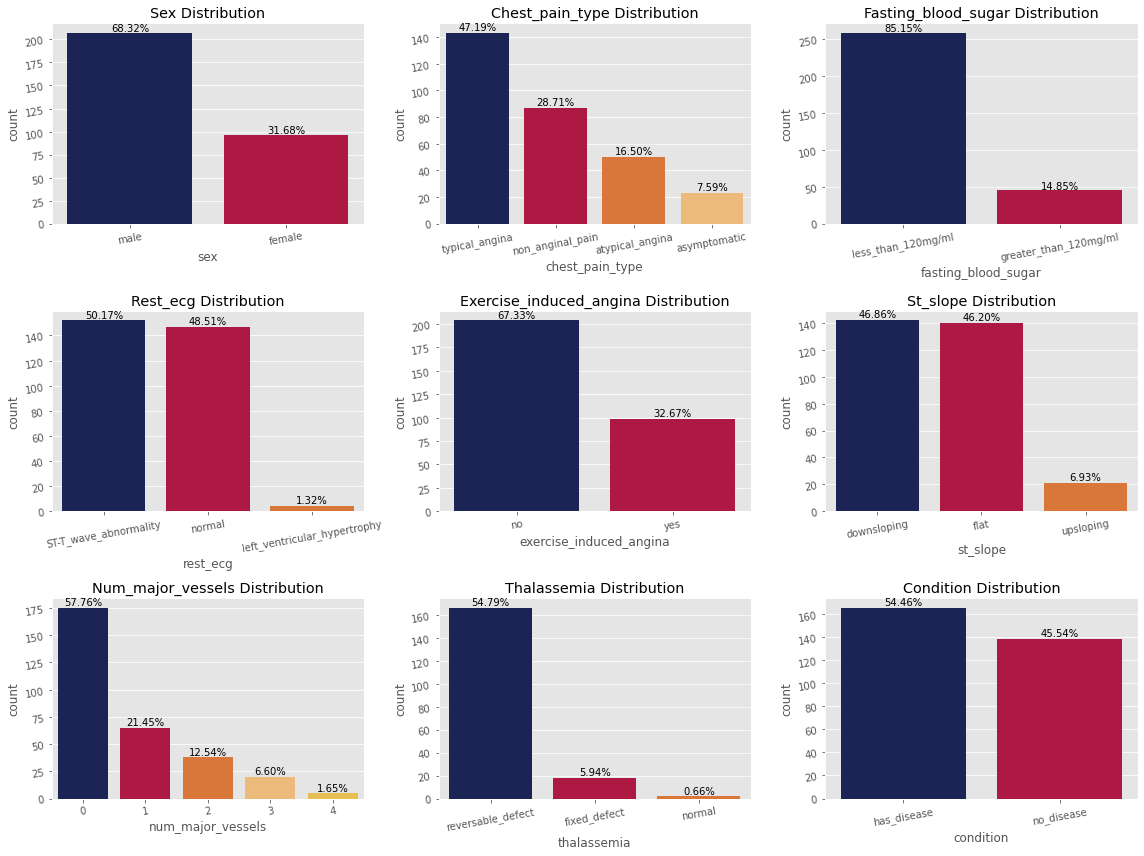

In [21]:
ctg_dist(df, categorical)

In [22]:
# Distribucion de datos numericos

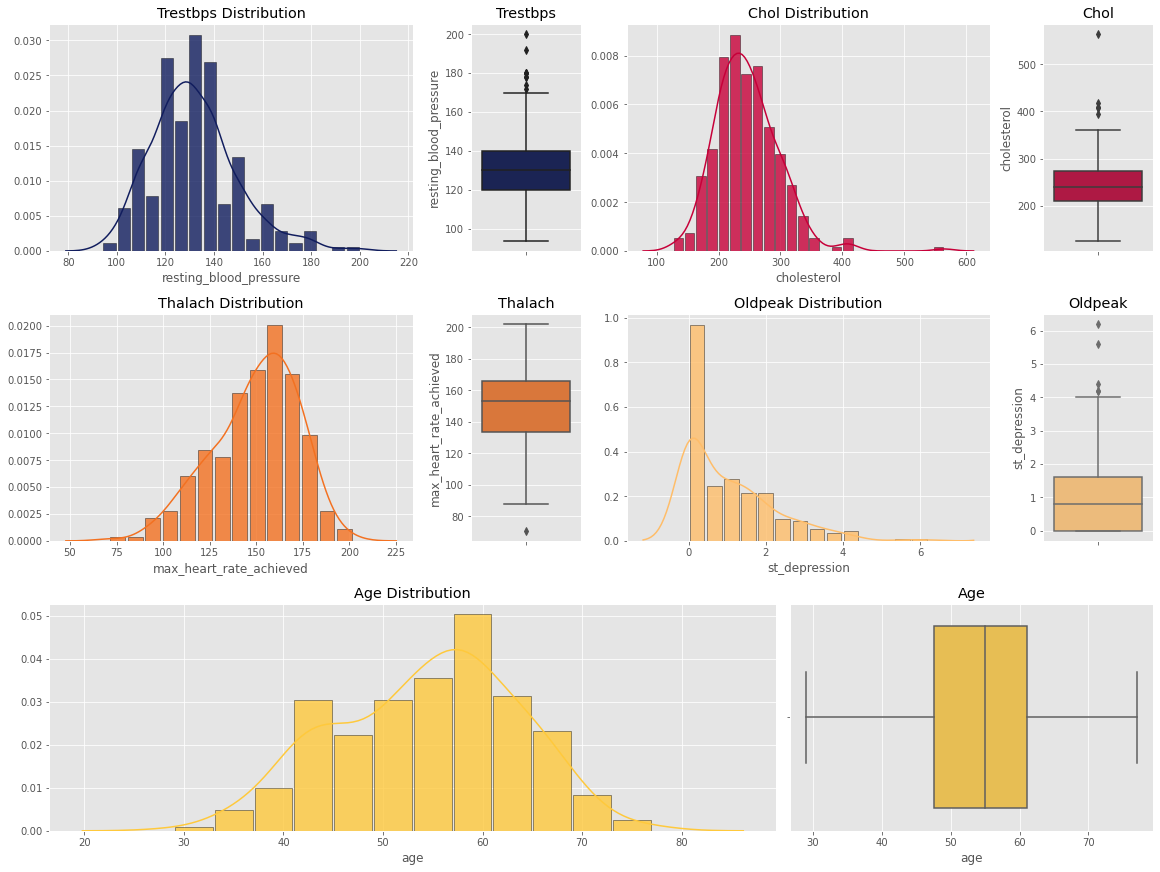

In [23]:

fig = plt.figure(constrained_layout=True, figsize=(16, 12))


grid = gridspec.GridSpec(ncols=6, nrows=3, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])

ax1.set_title('Trestbps Distribution')

sns.distplot(df[continuous[1]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[0])

ax15 = fig.add_subplot(grid[0, 2:3])

ax15.set_title('Trestbps')

sns.boxplot(df[continuous[1]], orient='v', color=cust_palt[0])

ax2 = fig.add_subplot(grid[0, 3:5])

ax2.set_title('Chol Distribution')

sns.distplot(df[continuous[2]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[1])

ax25 = fig.add_subplot(grid[0, 5:])

ax25.set_title('Chol')

sns.boxplot(df[continuous[2]], orient='v', color=cust_palt[1])

ax3 = fig.add_subplot(grid[1, :2])

ax3.set_title('Thalach Distribution')

sns.distplot(df[continuous[3]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[2])

ax35 = fig.add_subplot(grid[1, 2:3])

ax35.set_title('Thalach')

sns.boxplot(df[continuous[3]], orient='v', color=cust_palt[2])

ax4 = fig.add_subplot(grid[1, 3:5])

ax4.set_title('Oldpeak Distribution')

sns.distplot(df[continuous[4]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[3])

ax45 = fig.add_subplot(grid[1, 5:])

ax45.set_title('Oldpeak')

sns.boxplot(df[continuous[4]], orient='v', color=cust_palt[3])

ax5 = fig.add_subplot(grid[2, :4])

ax5.set_title('Age Distribution')

sns.distplot(df[continuous[0]],
                 hist_kws={
                 'rwidth': 0.95,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[4])

ax55 = fig.add_subplot(grid[2, 4:])

ax55.set_title('Age')

sns.boxplot(df[continuous[0]], orient='h', color=cust_palt[4])

plt.show()

In [24]:
# Categorica data vs Target

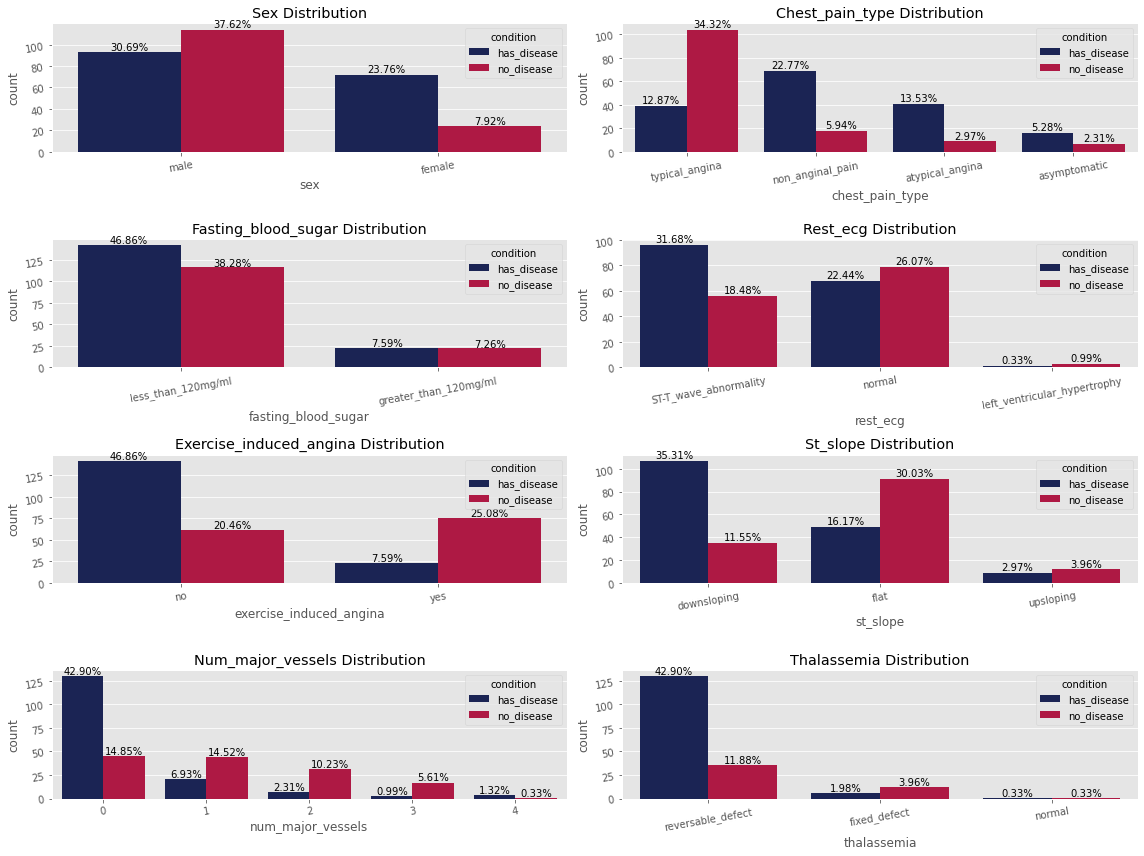

In [25]:
ctg_dist(df, categorical[:-1], 'condition', 4, 2)

In [26]:
# Numerica data vs Target

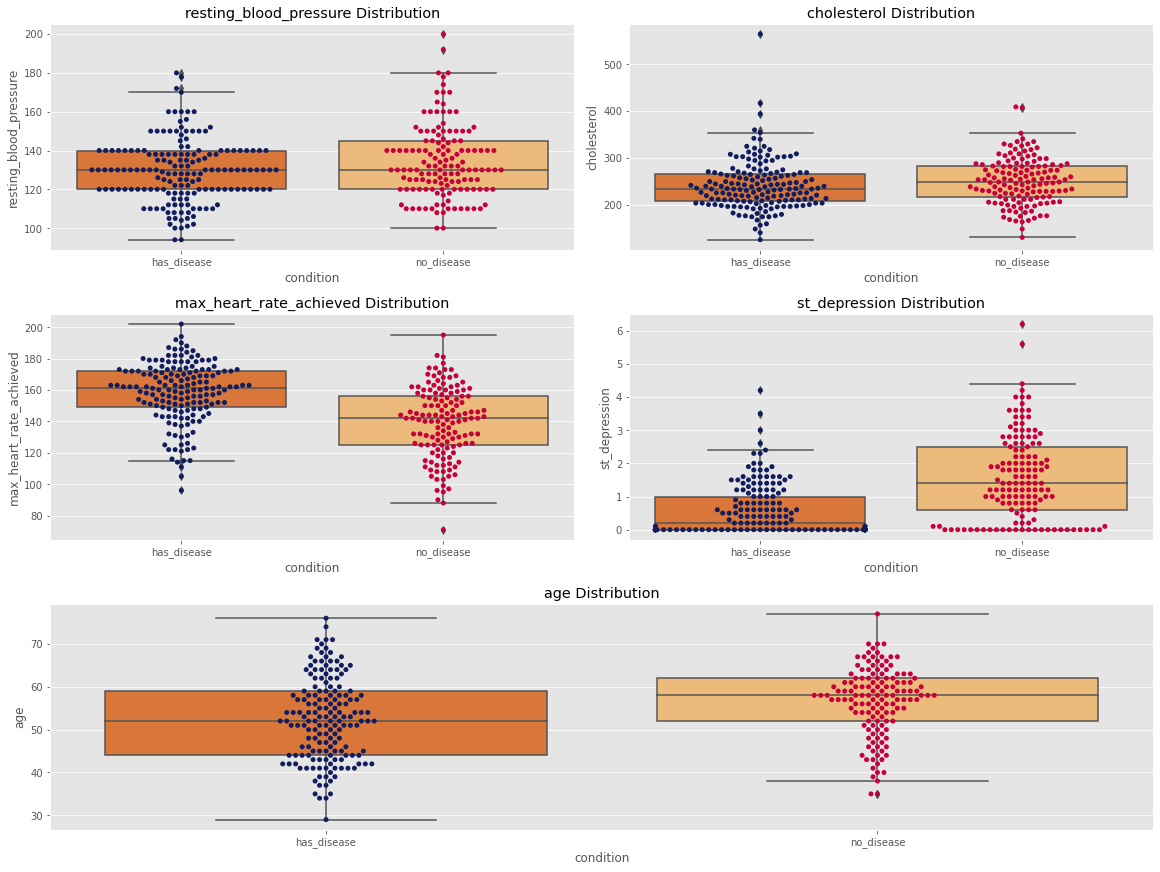

In [27]:
fig = plt.figure(constrained_layout=True, figsize=(16, 12))


grid = gridspec.GridSpec(ncols=4, nrows=3, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])

ax1.set_title('resting_blood_pressure Distribution')

sns.boxplot(x='condition',
                    y='resting_blood_pressure',
                    data=df,
                    palette=cust_palt[2:],
                    ax=ax1)
sns.swarmplot(x='condition',
                    y='resting_blood_pressure',
                    data=df,
                    palette=cust_palt[:2],
                    ax=ax1)

ax2 = fig.add_subplot(grid[0, 2:])

ax2.set_title('cholesterol Distribution')

sns.boxplot(x='condition',
                    y='cholesterol',
                    data=df,
                    palette=cust_palt[2:],
                    ax=ax2)
sns.swarmplot(x='condition',
                    y='cholesterol',
                    data=df,
                    palette=cust_palt[:2],
                    ax=ax2)

ax3 = fig.add_subplot(grid[1, :2])

ax3.set_title('max_heart_rate_achieved Distribution')

sns.boxplot(x='condition',
                    y='max_heart_rate_achieved',
                    data=df,
                    palette=cust_palt[2:],
                    ax=ax3)
sns.swarmplot(x='condition',
                    y='max_heart_rate_achieved',
                    data=df,
                    palette=cust_palt[:2],
                    ax=ax3)

ax4 = fig.add_subplot(grid[1, 2:])

ax4.set_title('st_depression Distribution')

sns.boxplot(x='condition',
                    y='st_depression',
                    data=df,
                    palette=cust_palt[2:],
                    ax=ax4)
sns.swarmplot(x='condition',
                    y='st_depression',
                    data=df,
                    palette=cust_palt[:2],
                    ax=ax4)

ax5 = fig.add_subplot(grid[2, :])

ax5.set_title('age Distribution')

sns.boxplot(x='condition',
                    y='age',
                    data=df,
                    palette=cust_palt[2:],
                    ax=ax5)
sns.swarmplot(x='condition',
                    y='age',
                    data=df,
                    palette=cust_palt[:2],
                    ax=ax5)
plt.show()

<Figure size 1152x720 with 0 Axes>

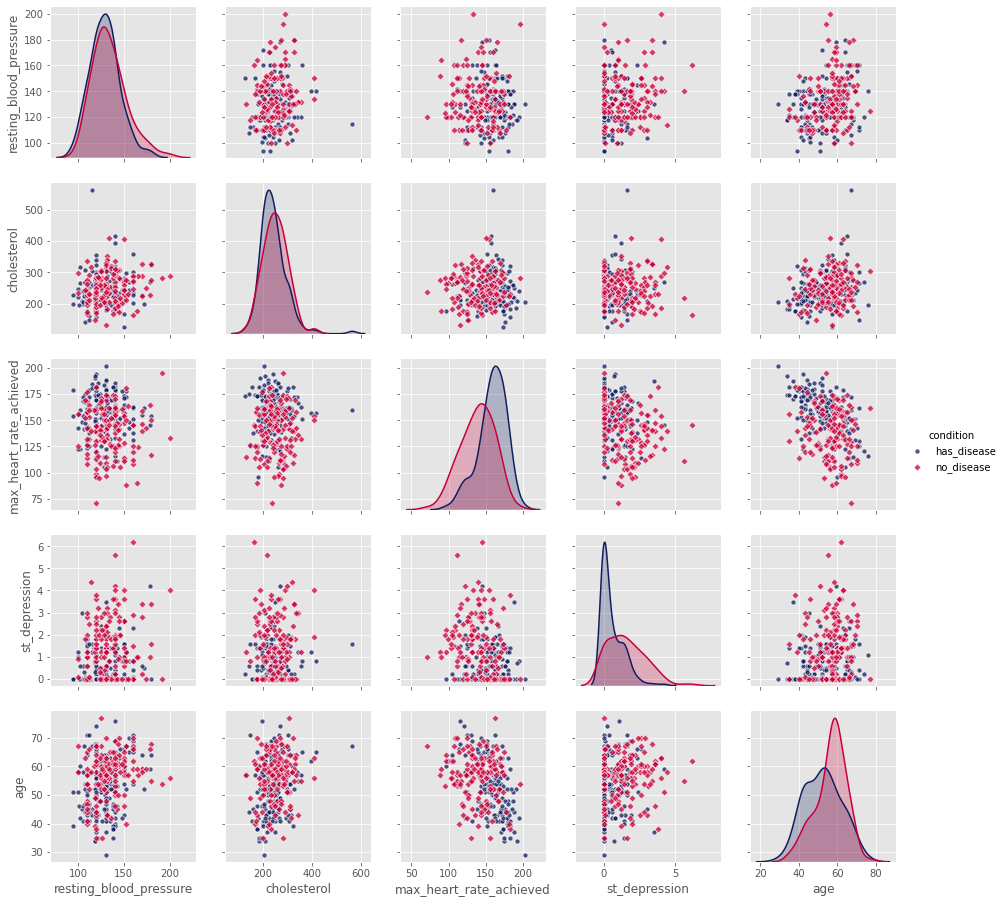

In [28]:
plt.figure(figsize=(16, 10))
sns.pairplot(df[['resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','age', 'condition']], 
             hue='condition', palette=cust_palt,
           markers=['o','D'], plot_kws=dict(s=25, alpha=0.75, ci=None)
            )

plt.show()

In [29]:
# Correlacion

In [30]:
heat_df = pd.read_csv("Heart.csv")

In [31]:
heat_df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'condition']

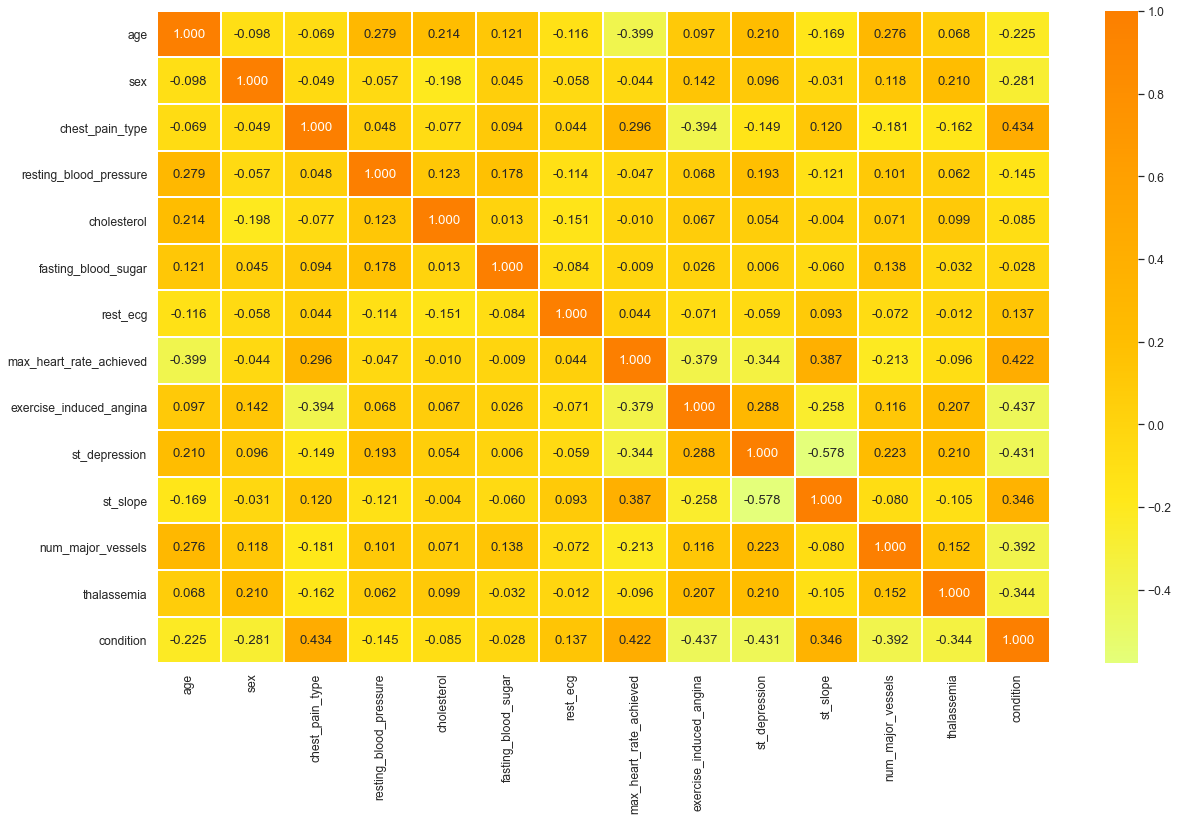

In [32]:
sns.set(font_scale=1.1)
correlation_df = heat_df.corr()
mask = np.triu(correlation_df.corr())
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_df,
            annot=True,
            fmt='.3f',
            cmap='Wistia',
            linewidths=1,
            cbar=True)

plt.show()

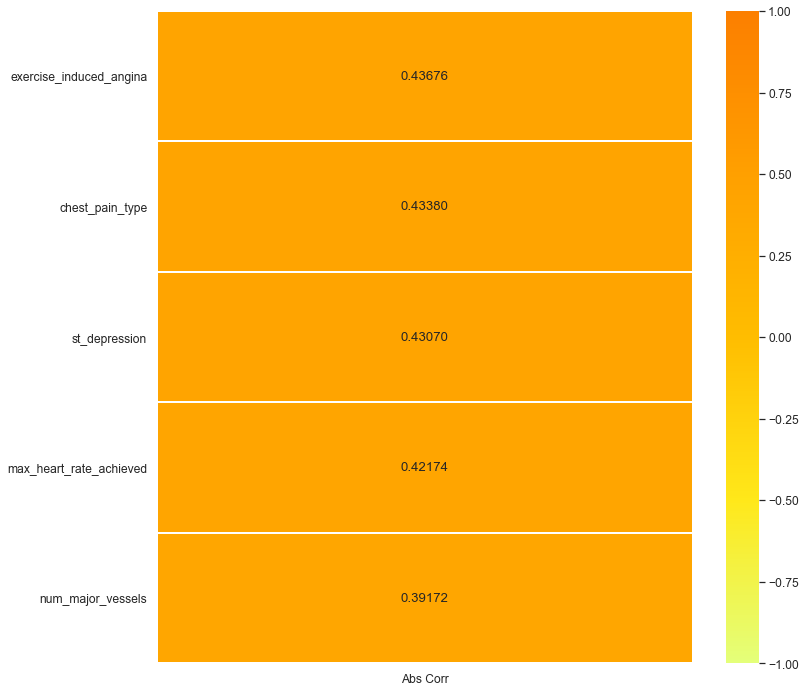

In [33]:
correlations = heat_df.corrwith(heat_df['condition']).iloc[:-1].to_frame()
correlations['Abs Corr'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('Abs Corr', ascending=False)['Abs Corr']
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(sorted_correlations.to_frame()[sorted_correlations>=.35],
            cmap='Wistia', annot=True, vmin=-1, vmax=1,linewidths=1,fmt='.5f', ax=ax);

In [34]:
X = df.drop('condition', axis=1)
y = heat_df['condition']

In [35]:
ctg_df = pd.get_dummies(data=df[['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'st_slope', 'num_major_vessels', 'thalassemia']])
X.drop(['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'st_slope', 'num_major_vessels', 'thalassemia'], axis=1, inplace=True)
X = pd.concat([X, ctg_df], axis=1)

In [36]:
gradclass = GradientBoostingClassifier(random_state=seed)

knclass = KNeighborsClassifier()

dectree = DecisionTreeClassifier(random_state=seed)

svc = SVC()

randfclass = RandomForestClassifier(random_state=seed)

adaclass = AdaBoostClassifier(random_state=seed)

gsclass = GaussianNB()

In [37]:
cv = KFold(5, shuffle=True, random_state=seed)
classifiers = [gradclass, knclass, dectree, svc, randfclass, adaclass, gsclass]

In [38]:
def model_check(X, y, classifiers, cv):
    
    
    model_table = pd.DataFrame()

    row_index = 0
    for cls in classifiers:

        MLA_name = cls.__class__.__name__
        model_table.loc[row_index, 'Model Name'] = MLA_name
        
        cv_results = cross_validate(
            cls,
            X,
            y,
            cv=cv,
            scoring=('accuracy','f1','roc_auc'),
            return_train_score=True,
            n_jobs=-1
        )
        model_table.loc[row_index, 'Train Roc/AUC Mean'] = cv_results[
            'train_roc_auc'].mean()
        model_table.loc[row_index, 'Test Roc/AUC Mean'] = cv_results[
            'test_roc_auc'].mean()
        model_table.loc[row_index, 'Test Roc/AUC Std'] = cv_results['test_roc_auc'].std()
        model_table.loc[row_index, 'Train Accuracy Mean'] = cv_results[
            'train_accuracy'].mean()
        model_table.loc[row_index, 'Test Accuracy Mean'] = cv_results[
            'test_accuracy'].mean()
        model_table.loc[row_index, 'Test Acc Std'] = cv_results['test_accuracy'].std()
        model_table.loc[row_index, 'Train F1 Mean'] = cv_results[
            'train_f1'].mean()
        model_table.loc[row_index, 'Test F1 Mean'] = cv_results[
            'test_f1'].mean()
        model_table.loc[row_index, 'Test F1 Std'] = cv_results['test_f1'].std()
        model_table.loc[row_index, 'Time'] = cv_results['fit_time'].mean()

        row_index += 1        

    model_table.sort_values(by=['Test F1 Mean'],
                            ascending=False,
                            inplace=True)

    return model_table

In [39]:
raw_models = model_check(X, y, classifiers, cv)
display(raw_models)

,Model Name,Train Roc/AUC Mean,Test Roc/AUC Mean,Test Roc/AUC Std,Train Accuracy Mean,Test Accuracy Mean,Test Acc Std,Train F1 Mean,Test F1 Mean,Test F1 Std,Time
4,RandomForestClassifier,1.000000,0.905593,0.029682,1.000000,0.831475,0.034664,1.000000,0.847947,0.027992,0.26896
0,GradientBoostingClassifier,0.999931,0.887460,0.036099,0.996701,0.801913,0.049632,0.997009,0.820128,0.038314,0.16400
6,GaussianNB,0.893298,0.858323,0.051020,0.815998,0.785464,0.045862,0.836326,0.807160,0.053222,0.00720
5,AdaBoostClassifier,0.986828,0.836859,0.075578,0.934816,0.775464,0.053625,0.940904,0.801288,0.040970,0.14152
2,DecisionTreeClassifier,1.000000,0.776845,0.028428,1.000000,0.778798,0.023059,1.000000,0.799462,0.019614,0.00880
3,SVC,0.759426,0.731313,0.106884,0.665021,0.656448,0.067423,0.732524,0.721329,0.056617,0.01300
1,KNeighborsClassifier,0.844947,0.720570,0.051450,0.767306,0.673279,0.067152,0.791601,0.708466,0.070601,0.00900


In [40]:
def f_imp(classifiers, X, y, bins):    
  

    
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    axes = axes.flatten()

    for ax, classifier in zip(axes, classifiers):

        try:
            classifier.fit(X, y)
            feature_imp = pd.DataFrame(sorted(
                zip(classifier.feature_importances_, X.columns)),
                                       columns=['Value', 'Feature'])

            sns.barplot(x="Value",
                        y="Feature",
                        data=feature_imp.sort_values(by="Value",
                                                     ascending=False),
                        ax=ax,
                        palette='plasma')
            plt.title('Features')
            plt.tight_layout()
            ax.set(title=f'{classifier.__class__.__name__} Feature Importances')
            ax.xaxis.set_major_locator(MaxNLocator(nbins=bins))
        except:
            continue
    plt.show()

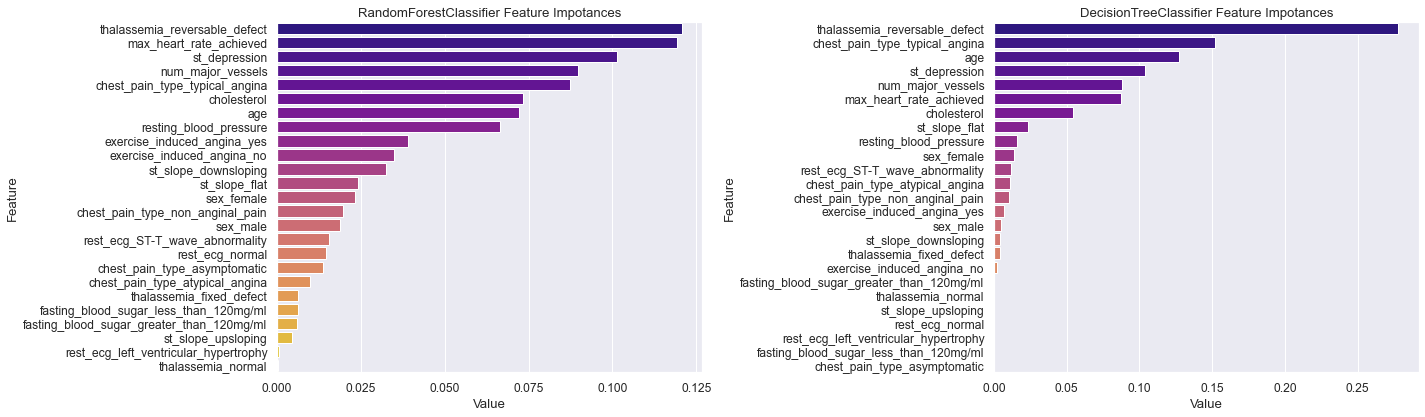

In [41]:
f_imp([randfclass,dectree], X, y, 6)